[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 13ms/step
Root Mean Squared Error (RMSE): 5.1891373874167614


C:\Users\Admin\AppData\Local\Temp\ipykernel_39176\1265634117.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


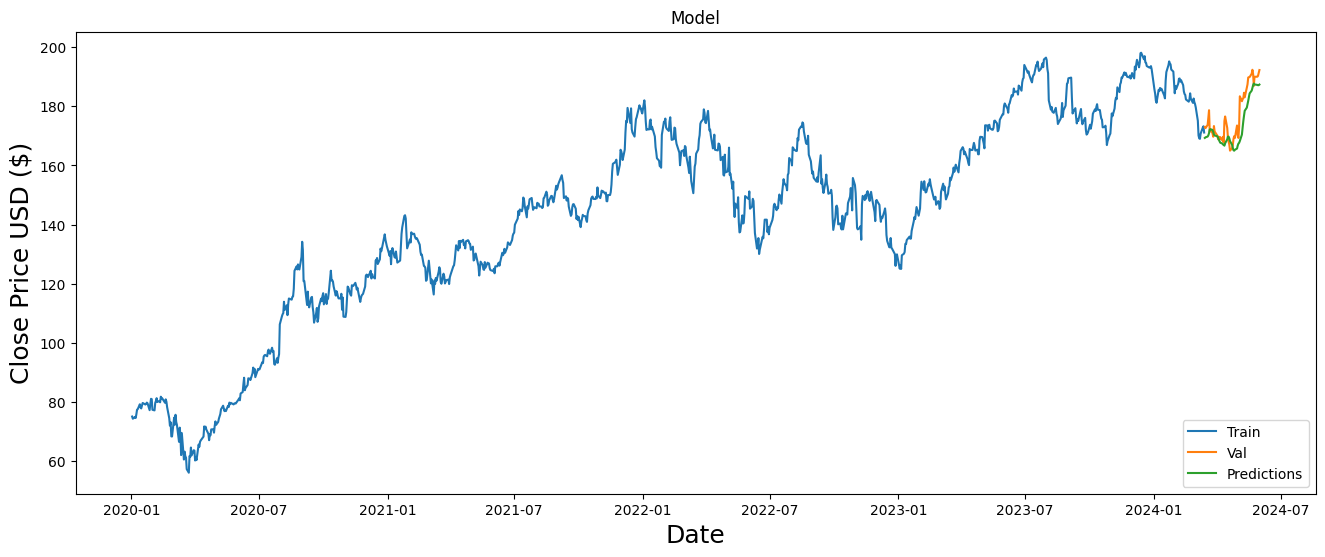

                 Close  Predictions
Date                               
2024-03-14  173.000000   169.298584
2024-03-15  172.619995   169.509293
2024-03-18  173.720001   169.761597
2024-03-19  176.080002   170.165619
2024-03-20  178.669998   170.929825
2024-03-21  171.369995   172.129211
2024-03-22  172.279999   172.234314
2024-03-25  170.850006   171.983780
2024-03-26  169.710007   171.361038
2024-03-27  173.309998   170.479965
2024-03-28  171.479996   170.147827
2024-04-01  170.029999   169.823181
2024-04-02  168.839996   169.347382
2024-04-03  169.649994   168.699203
2024-04-04  168.820007   168.191635
2024-04-05  169.580002   167.694595
2024-04-08  168.449997   167.396942
2024-04-09  169.669998   167.064926
2024-04-10  167.779999   166.957977
2024-04-11  175.039993   166.683472
2024-04-12  176.550003   167.474258
2024-04-15  172.690002   168.844513
2024-04-16  169.380005   169.708954
2024-04-17  168.000000   169.730835
2024-04-18  167.039993   169.150742
2024-04-19  165.000000   168

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
# Get the stock quote
df = yf.download('AAPL', start='2020-01-01', end=pd.to_datetime('today'))

# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)